# Matplotlib 系列：图解 quiver

#### Reference: 
https://zhajiman.github.io/post/matplotlib_quiver/
https://blog.csdn.net/weixin_43718675/article/details/104589175

## 前言
Matplotlib 中用箭头表示风场或电磁场等矢量场时需要用到 quiver 方法，据字典，quiver 一词的意思是颤动、颤抖或箭袋，貌似也就最后一个意思跟箭头搭得上边。

## 箭头的位置和数值
据文档，quiver 的函数签名为

`quiver([X, Y], U, V, [C], **kw)`

- X 和 Y 指定矢量及箭头的位置。
- U 和 V 指定矢量的横纵分量。
- C 数组的数值会通过 cmap 和 norm 映射为箭头的颜色（原理详见 Matplotlib 系列：colormap 的设置），例如可以取矢量长度 np.hypot(U, V), np.sqrt(U**2, V**2)。如果只是想让所有箭头颜色相同，使用 color 参数即可。
quiver 既可以像 scatter 那样接受一维散点数据，画出任意位置的箭头，也可以像 pcolormesh 那样绘制二维网格数据。

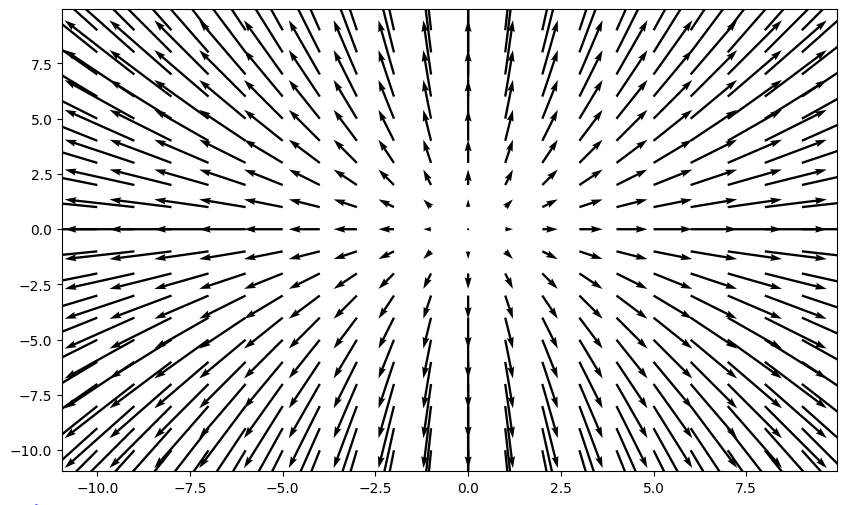

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig1,ax1 = plt.subplots(1,1,figsize = (10,6))

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16,
        }

##画出风速
h1 = ax1.quiver(X,Y,U,V,     #X,Y,U,V 确定位置和对应的风速
                width = 0.003, #箭杆箭身宽度
                scale = 100,    # 箭杆长度,参数scale越小箭头越长
                )  

#画出风场，和箭头箭轴后，得说明 箭轴长度与风速的对应关系
#调用quiver可以生成 参考箭头 + label。
ax1.quiverkey(h1,                      #传入quiver句柄
              X=0.09, Y = 0.051,       #确定 label 所在位置，都限制在[0,1]之间
              U = 5,                    #参考箭头长度 表示风速为5m/s。
              angle = 0,            #参考箭头摆放角度。默认为0，即水平摆放
             label='v:5m/s',        #箭头的补充：label的内容  + 
             labelpos='S',          #label在参考箭头的哪个方向; S表示南边
             color = 'b',labelcolor = 'b', #箭头颜色 + label的颜色
             fontproperties = font,        #label 的字体设置：大小，样式，weight
             coordinates='figure', # coordinates='figure', label会移至图外 
             )      

plt.show()

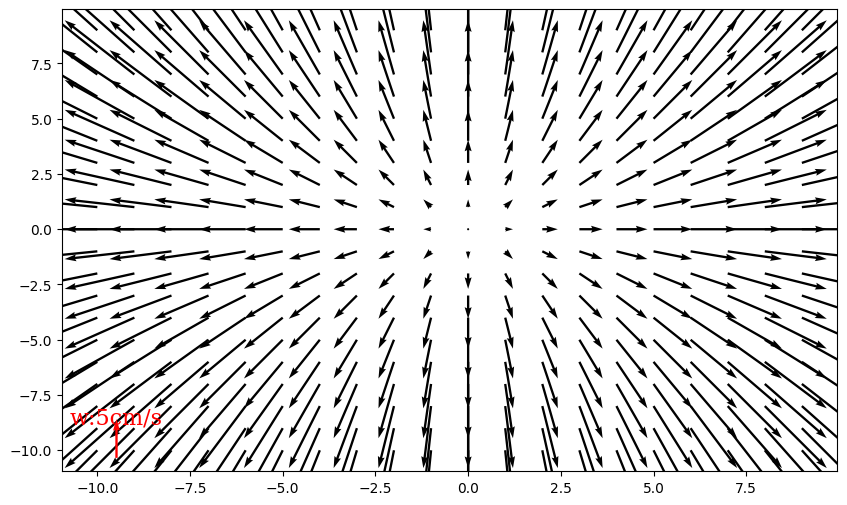

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig1,ax1 = plt.subplots(1,1,figsize = (10,6))

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16,
        }

##画出风速
h1 = ax1.quiver(X,Y,U,V,     #X,Y,U,V 确定位置和对应的风速
                width = 0.003, #箭杆箭身宽度
                scale = 100,    # 箭杆长度,参数scale越小箭头越长
                ) 
#由于风有U\V两个方向，最好设置两个方向的参考箭头 + label
ax1.quiverkey(h1, X=0.07, Y = 0.071,   
              U = 5, 
              angle = 90,           #参考箭头摆放角度，90即垂直摆放    
              label = 'w:5cm/s',    #label内容
              labelpos='N',         #label在参考箭头的北边
              color = 'r',          #箭头颜色
              labelcolor = 'r',     #label颜色
              fontproperties = font,
              coordinates='axes',) # coordinates='axes', label会移至图外 

##虽然也可以用plt.text来设置label和箭头，但是会比较繁琐。
plt.show()